<a href="https://colab.research.google.com/github/Sagargomad/My_projects/blob/main/Relative_importance_of_elements_in_predicting_remanence_in_NdFeB_magnets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Pandas is used for data manipulation
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error









# Read in data and display first 5 rows
features = pd.read_excel('/content/drive/MyDrive/Mtech project/ML TABLE 3.0.xlsx')
features.head(5)

,Sl. No.,Type of magnet,Base magnet composition (at.%),Magnet prep. process,Nd,Pr,Tb,Ce,Dy,Fe,...,Ti,Mn,O,Coercivity(T),Remanence(T),BHmax (kJ/m3),β(-%/°C),α(-%/°C),Reference,Unnamed: 28
0,1,hot-deformed magnets,"Nd13.2Fe76.0Co5.6B4.7Ga0.5 in at%,",NaN,13.2,0.0,0.0,0.0,0.0,76.00,...,0,0,0.0,0.90,1.50,0.0,0.52,0.0,Coercivity of the Nd–Fe–B hot-deformed magnets...,NaN
1,2,Dy free sintered Nd-Fe-B,Nd14.3Fe78.15B6.0Cu0.1Al0.4Co1.0Ga0.05,NaN,14.3,0.0,0.0,0.0,0.0,78.15,...,0,0,0.0,0.64,1.39,0.0,0.00,0.0,Microstructure and coercivity of grain boundar...,NaN
2,3,Dy containing sintered Nd-Fe-B,Nd11.2Dy3.1Fe78.15B6.0Cu0.1Al0.4Co1.0Ga0.05,NaN,11.2,0.0,0.0,0.0,3.1,78.15,...,0,0,0.0,2.29,1.21,0.0,0.00,0.0,Microstructure and coercivity of grain boundar...,NaN
3,4,hot-deformed magnets,Nd13.2Fe76Co5.6B4.7Ga0.5 (at.%).,NaN,13.2,0.0,0.0,0.0,0.0,76.00,...,0,0,0.0,0.91,1.50,0.0,0.00,0.0,Coercivity enhancement of hot-deformed Nd-Fe-B...,
4,5,hot-deformed magnets,Nd11.2Dy3.1Fe78.15B6.0Cu0.1Al0.4Co1.0Ga0.05,NaN,11.2,0.0,0.0,0.0,3.1,78.15,...,0,0,0.0,0.91,1.50,0.0,0.00,0.0,Coercivity enhancement of hot-deformed Nd-Fe-B...,


In [ ]:
 features=features.replace(np. nan,0)

In [ ]:
features=features.replace(r' ', np.nan, regex=True)

In [ ]:
features=features.fillna(0)

In [ ]:
features['BHmax (kJ/m3)']

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
       ...  
99       0.0
100    411.0
101      0.0
102      0.0
103    232.0
Name: BHmax (kJ/m3), Length: 104, dtype: float64

In [ ]:

features=features.reset_index(drop=True)

In [ ]:
features.columns

Index(['Sl. No.', 'Type of magnet', 'Base magnet composition (at.%)',
       'Magnet prep. process ', 'Nd', 'Pr', 'Tb', 'Ce', 'Dy', 'Fe', 'Ni', 'Al',
       'Co', 'B', 'Cu', 'Ga', 'Zr', 'Nb', 'Si', 'Ti', 'Mn', 'O',
       'Coercivity(T)', 'Remanence(T)', 'BHmax (kJ/m3)', 'β(-%/°C)',
       'α(-%/°C)', 'Reference', 'Unnamed: 28'],
      dtype='object')

In [ ]:
features=features[['Nd', 'Pr', 'Tb', 'Ce', 'Dy', 'Fe', 'Ni', 'Al',
       'Co', 'B', 'Cu', 'Ga', 'Zr', 'Nb', 'Si', 'Ti', 'Mn', 'O',
       'Remanence(T)']]

In [ ]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Nd            104 non-null    float64
 1   Pr            104 non-null    float64
 2   Tb            104 non-null    float64
 3   Ce            104 non-null    float64
 4   Dy            104 non-null    float64
 5   Fe            104 non-null    float64
 6   Ni            104 non-null    float64
 7   Al            104 non-null    float64
 8   Co            104 non-null    float64
 9   B             104 non-null    float64
 10  Cu            104 non-null    float64
 11  Ga            104 non-null    float64
 12  Zr            104 non-null    float64
 13  Nb            104 non-null    float64
 14  Si            104 non-null    float64
 15  Ti            104 non-null    int64  
 16  Mn            104 non-null    int64  
 17  O             104 non-null    float64
 18  Remanence(T)  104 non-null    

In [ ]:
# Use numpy to convert to arrays
import numpy as np
# Labels are the values we want to predict
labels = np.array(features['Remanence(T)'])
# Remove the labels from the features
# axis 1 refers to the columns
features= features.drop('Remanence(T)', axis = 1)
# Saving feature names for later use
feature_list = list(features.columns)
# Convert to numpy array
features = np.array(features)

In [ ]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state = 42)

In [ ]:
print('The shape of our features is:', features.shape)

The shape of our features is: (104, 18)


In [ ]:
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (78, 18)
Training Labels Shape: (78,)
Testing Features Shape: (26, 18)
Testing Labels Shape: (26,)


In [ ]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf.fit(train_features, train_labels);

In [ ]:
from sklearn.model_selection import cross_validate

In [ ]:
# cross_validate also allows to specify metrics which you want to see
for i, score in enumerate(cross_validate(rf, train_features,train_labels, cv=5)["test_score"]):
    print(f"Accuracy for the fold no. {i} on the test set: {score}")

Accuracy for the fold no. 0 on the test set: -0.5046392741344512
Accuracy for the fold no. 1 on the test set: 0.4565703117960306
Accuracy for the fold no. 2 on the test set: 0.30159038251542536
Accuracy for the fold no. 3 on the test set: 0.020597750982970675
Accuracy for the fold no. 4 on the test set: -0.0921234347458657


In [ ]:
# Use the forest's predict method on the test data
predictions = rf.predict(test_features)
# Calculate the absolute errors
errors = abs(predictions - test_labels)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 0.4 degrees.


In [ ]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / test_labels)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: -inf %.


<ipython-input-50-f46941e48193>:2: RuntimeWarning: divide by zero encountered in true_divide
  mape = 100 * (errors / test_labels)


In [ ]:
from sklearn.metrics import r2_score

In [ ]:
predictions_train = rf.predict(train_features)

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
mean_squared_error(train_labels, predictions_train)

0.06742703075534423

In [ ]:
mean_squared_error(test_labels, predictions)

0.3618351563978176

In [ ]:
r2_score(train_labels, predictions_train)

0.8177117303720116

In [ ]:
r2_score(test_labels, predictions)

0.16722808032283554

In [ ]:
# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot
# Pull out one tree from the forest
tree = rf.estimators_[5]
# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot
# Pull out one tree from the forest
tree = rf.estimators_[5]
# Export the image to a dot file
export_graphviz(tree, out_file = 'tree.dot', feature_names = feature_list, rounded = True, precision = 1)
# Use dot file to create a graph
(graph, ) = pydot.graph_from_dot_file('tree.dot')
# Write graph to a png file
graph.write_png('tree.png')


In [ ]:
# Limit depth of tree to 3 levels
rf_small = RandomForestRegressor(n_estimators=10, max_depth = 3)
rf_small.fit(train_features, train_labels)
# Extract the small tree
tree_small = rf_small.estimators_[5]
# Save the tree as a png image
export_graphviz(tree_small, out_file = 'small_tree.dot', feature_names = feature_list, rounded = True, precision = 1)
(graph, ) = pydot.graph_from_dot_file('small_tree.dot')
graph.write_png('small_tree.png');

In [ ]:
# Get numerical feature importances
importances = list(rf.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: Co                   Importance: 0.2
Variable: Dy                   Importance: 0.16
Variable: Fe                   Importance: 0.16
Variable: Nd                   Importance: 0.1
Variable: Nb                   Importance: 0.1
Variable: B                    Importance: 0.09
Variable: Si                   Importance: 0.05
Variable: Pr                   Importance: 0.04
Variable: Ce                   Importance: 0.04
Variable: O                    Importance: 0.03
Variable: Cu                   Importance: 0.02
Variable: Ga                   Importance: 0.02
Variable: Al                   Importance: 0.01
Variable: Tb                   Importance: 0.0
Variable: Ni                   Importance: 0.0
Variable: Zr                   Importance: 0.0
Variable: Ti                   Importance: 0.0
Variable: Mn                   Importance: 0.0


In [ ]:
# New random forest with only the two most important variables
rf_most_important = RandomForestRegressor(n_estimators= 1000, random_state=42)
# Extract the two most important features
important_indices = [feature_list.index('Dy'), feature_list.index('Nd'),feature_list.index('Ce'),feature_list.index('Al'),feature_list.index('Co')]
train_important = train_features[:, important_indices]
test_important = test_features[:, important_indices]
# Train the random forest
rf_most_important.fit(train_important, train_labels)
# Make predictions and determine the error
predictions = rf_most_important.predict(test_important)
errors = abs(predictions - test_labels)
# Display the performance metrics
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')
mape = np.mean(100 * (errors / test_labels))
accuracy = 100 - mape
print('Accuracy:', round(accuracy, 2), '%.')

Mean Absolute Error: 0.41 degrees.
Accuracy: -inf %.


<ipython-input-27-f0850b926371>:14: RuntimeWarning: divide by zero encountered in true_divide
  mape = np.mean(100 * (errors / test_labels))


In [ ]:
predictions_train = rf_most_important.predict(train_important)

In [ ]:
mean_squared_error(train_labels, predictions_train)

0.043831840040299955

In [ ]:
mean_squared_error(test_labels, predictions)

0.3384893494679021

In [ ]:
r2_score(test_labels, predictions)

-0.12104247561331216

In [ ]:
r2_score(train_labels, predictions_train)

0.8959576124408317

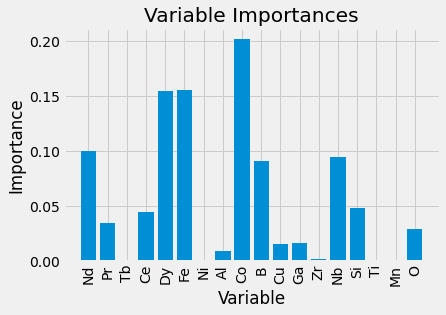

In [ ]:
# Import matplotlib for plotting and use magic command for Jupyter Notebooks
import matplotlib.pyplot as plt
%matplotlib inline
# Set the style
plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, feature_list, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

In [ ]:
# Get numerical feature importances
importances = list(rf.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances]

Variable: Co                   Importance: 0.2
Variable: Dy                   Importance: 0.16
Variable: Fe                   Importance: 0.16
Variable: Nd                   Importance: 0.1
Variable: Nb                   Importance: 0.1
Variable: B                    Importance: 0.09
Variable: Si                   Importance: 0.05
Variable: Pr                   Importance: 0.04
Variable: Ce                   Importance: 0.04
Variable: O                    Importance: 0.03
Variable: Cu                   Importance: 0.02
Variable: Ga                   Importance: 0.02
Variable: Al                   Importance: 0.01
Variable: Tb                   Importance: 0.0
Variable: Ni                   Importance: 0.0
Variable: Zr                   Importance: 0.0
Variable: Ti                   Importance: 0.0
Variable: Mn                   Importance: 0.0


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

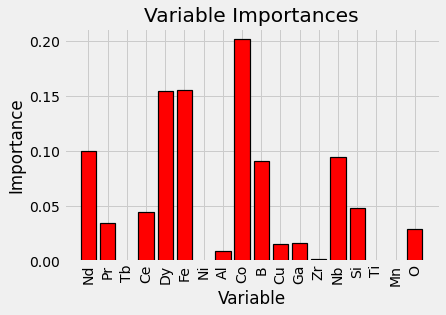

In [ ]:
# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical', color = 'r', edgecolor = 'k', linewidth = 1.2)
# Tick labels for x axis
plt.xticks(x_values, feature_list, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

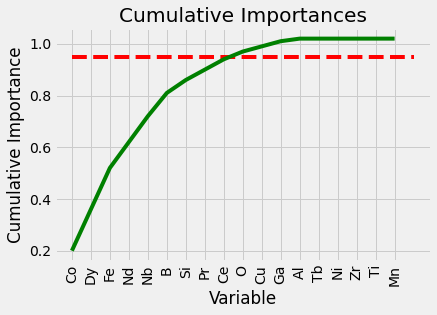

In [ ]:
# List of features sorted from most to least important
sorted_importances = [importance[1] for importance in feature_importances]
sorted_features = [importance[0] for importance in feature_importances]
# Cumulative importances
cumulative_importances = np.cumsum(sorted_importances)
# Make a line graph
plt.plot(x_values, cumulative_importances, 'g-')
# Draw line at 95% of importance retained
plt.hlines(y = 0.95, xmin=0, xmax=len(sorted_importances), color = 'r', linestyles = 'dashed')
# Format x ticks and labels
plt.xticks(x_values, sorted_features, rotation = 'vertical')
# Axis labels and title
plt.xlabel('Variable'); plt.ylabel('Cumulative Importance'); plt.title('Cumulative Importances');

In [ ]:
# Find number of features for cumulative importance of 95%
# Add 1 because Python is zero-indexed
print('Number of features for 95% importance:', np.where(cumulative_importances > 0.95)[0][0] + 1)

Number of features for 95% importance: 8


In [ ]:
# Extract the names of the most important features
important_feature_names = [feature[0] for feature in feature_importances[0:5]]
# Find the columns of the most important features
important_indices = [feature_list.index(feature) for feature in important_feature_names]
# Create training and testing sets with only the important features
important_train_features = train_features[:, important_indices]
important_test_features = test_features[:, important_indices]
# Sanity check on operations
print('Important train features shape:', important_train_features.shape)
print('Important test features shape:', important_test_features.shape)

Important train features shape: (78, 5)
Important test features shape: (26, 5)


In [ ]:
# Train the expanded model on only the important features
rf.fit(important_train_features, train_labels);
# Make predictions on test data
predictions = rf.predict(important_test_features)
# Performance metrics
errors = abs(predictions - test_labels)
print('Average absolute error:', round(np.mean(errors), 2), 'degrees.')
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / test_labels)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Average absolute error: 0.4 degrees.
Accuracy: -inf %.


<ipython-input-38-6bee6b85fa70>:9: RuntimeWarning: divide by zero encountered in true_divide
  mape = 100 * (errors / test_labels)


In [ ]:
r2_score(test_labels, predictions)

0.2507696942288865

In [ ]:
predictions_train = rf.predict(important_train_features)

In [ ]:
r2_score(train_labels, predictions_train)

0.9242011487125728

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state = 42)
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [ ]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation,
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(train_features, train_labels)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [ ]:
rf_random.best_estimator_

RandomForestRegressor(bootstrap=False, max_depth=60, max_features='sqrt',
                      min_samples_split=5, n_estimators=600)

In [ ]:
best_random = rf_random.best_estimator_
random_accuracy = evaluate(best_random, test_features, test_labels)

Model Performance
Average Error: 14.1753 degrees.
Accuracy = -inf%.


<ipython-input-46-e50d9bd78ab1>:4: RuntimeWarning: divide by zero encountered in true_divide
  mape = 100 * np.mean(errors / test_labels)


In [ ]:
print('Improvement of {:0.2f}%.'.format( 100 * (random_accuracy - base_accuracy) / base_accuracy)

SyntaxError: ignored

In [ ]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search
param_grid = {
    'bootstrap': [True],
    'max_depth': [10, 20, 50, 70],
    'max_features': [2, 8],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [10, 20, 30, 40,50]
}
# Create a based model
rf = RandomForestRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid,
                          cv = 3, n_jobs = -1, verbose = 2)

In [ ]:
# Fit the grid search to the data
grid_search.fit(train_features, train_labels)


Fitting 3 folds for each of 360 candidates, totalling 1080 fits


GridSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [10, 20, 50, 70],
                         'max_features': [2, 8], 'min_samples_leaf': [3, 4, 5],
                         'min_samples_split': [8, 10, 12],
                         'n_estimators': [10, 20, 30, 40, 50]},
             verbose=2)

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [ ]:
rf = RandomForestRegressor(
                           n_estimators = grid_search.best_params_['n_estimators'],
                           max_features = grid_search.best_params_['max_features'],
                           max_depth = grid_search.best_params_['max_depth'],
                           random_state = 0)

rf.fit(train_features, train_labels)

n_scores = cross_val_score(rf, train_features, train_labels,
                           cv=KFold(n_splits=5, shuffle=True, random_state=1)).mean()

In [ ]:
n_scores

-0.9976634585613887

In [ ]:
grid_search.score(test_features,test_labels)

0.35764385811641164